LaTeX header (do not delete)
$$
\newcommand{\Re}[1]{\mathrm{Re}\left\{ #1 \right\}}
\newcommand{\Im}[1]{\mathrm{Im}\left\{ #1 \right\}}
\newcommand{\avg}[1]{\left< #1 \right>}
$$

# Step 1 -- Simple Harmonic Oscillations
---

### Equation of motion

Here we consider "the" simple harmonic oscillator, that is, a 1D oscillator whose motion is governed by the linear ODE

$$
  m\ddot{x} + kx = 0,
$$

where $m$ is the mass of the oscillator and $k$ is the 'spring constant' of the linear restoring force. Dividing by $m$ yields the equation of motion, which we write as

$$
  \ddot{x} + \omega_{0}^2 x = 0
  \quad\quad\text{with}\quad\quad
  \omega_{0} \equiv \sqrt{\frac{k}{m}}.
$$

### Solutions
The solutions to this equation are well-known, studied by every student of ordinary differential equations. The general solutions take many forms. Here we state a few of the more common ones:

$$
  \begin{array}{lll}
    \text{Form 1:} & 
    x(t) = A_{1}\cos(\omega_{0}t) + B_{1}\sin(\omega_{0}t) &
    \text{($A_{1}$, $B_{1}$ real)} \\
    \text{Form 2:} & 
    x(t) = A_{2}\exp(i\omega_{0}t) + B_{2}\exp(-i\omega_{0}t) &
    \text{($A_{2}$, $B_{2}$ complex with $A_{2}^{*}=B_{2}$ so that $x(t)$ is real)} \\
    \text{Form 3:} & 
    x(t) = A\cos(\omega_{0}t - \delta) &
    \text{($A$, $\delta$ real)} \\
  \end{array}
$$

The coefficients are related to the initial conditions $x_{0}\equiv x(0)$ and $\dot{x}_{0}\equiv\dot{x}(0)$. These relationships are different in the different forms above. 

**Exercise [pen & paper]:** show that each of the above forms are in fact solutions to the equation of motion.

**Exercise [pen & paper]:** show that the relationships between the coefficients in the different forms are

\begin{align}
  & \text{Form 1}\leftrightarrow\text{Form 2}:
  \quad\quad
  \left\{\begin{array}{l}
    A_{1} = A_{2} + B_{2} \\
    B_{1} = i(A_{2} - B_{2})
  \end{array}\right\}
  \quad\quad\leftrightarrow\quad\quad
  \left\{\begin{array}{l}
    A_{2} = \frac{1}{2}(A_{1} - iB_{1}) \\
    B_{2} = \frac{1}{2}(A_{1} + iB_{1})
  \end{array}\right\}
\\
  & \text{Form 1}\leftrightarrow\text{Form 3}:
  \quad\quad
  \left\{\begin{array}{l}
    A_{1} = A\cos\delta \\
    B_{1} = A\sin\delta
  \end{array}\right\}
  \quad\quad\leftrightarrow\quad\quad
  \left\{\begin{array}{l}
    A = \sqrt{A_{1}^2 + B_{1}^2} \\
    \delta = \arctan\left(\frac{B_{1}}{A_{1}}\right)
  \end{array}\right\}
\\
  & \text{Form 2}\leftrightarrow\text{Form 3}:
  \quad\quad
  \left\{\begin{array}{l}
    A_{2} = \frac{1}{2}A e^{-i\delta}\\
    B_{2} = \frac{1}{2}A e^{i\delta}
  \end{array}\right\}
  \quad\quad\leftrightarrow\quad\quad
  \left\{\begin{array}{l}
    A = 2\sqrt{A_{2}B_{2}} \\
    \delta = \arctan\left(\frac{-i(B_{1}-A_{1})}{(B_{1}+A_{1})}\right)
  \end{array}\right\}
\end{align}

### Initial conditions

The coefficients in the above solutions are related to the initial conditions $x_{0}$ and $\dot{x}_{0}$. For form 3 above, these relations are

$$
  A = \sqrt{x_{0}^2 + \left(\frac{\dot{x}_{0}}{\omega_{0}}\right)^2}
  \quad\quad,\quad\quad
  \delta = \arctan\left(\frac{\dot{x}_{0}}{\omega_{0} x_{0}}\right)
$$

**Exercise [pen & paper]:** show this.

**Exercise [pen & paper]:** obtain relationships between the cooefficients of forms 1 and 2 in terms of the initial conditions $x_{0}$ and $\dot{x}_{0}$.

## 1. Plot motion vs time

**Exercise [matplotlib]:** With the above results in hand, plot the position, velocity, and acceleration on the same graph as functions of time. Plot the solutions for initial conditions $x_{0}=L$ and $\dot{x}_{0}=\omega_{0}L$ for an arbitrary length scale $L$.

In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

In [6]:
### motion functions ###
def xva(t, omega0, x0, vx0):
    A = np.sqrt(x0*x0 + vx0*vx0/(omega0*omega0))
    delta = np.arctan(vx0/(omega0*x0))
    x = A*np.cos(omega0*t - delta)
    vx = -omega0*A*np.sin(omega0*t - delta)
    ax = -omega0*omega0*A*np.cos(omega0*t - delta)
    return x, vx, ax

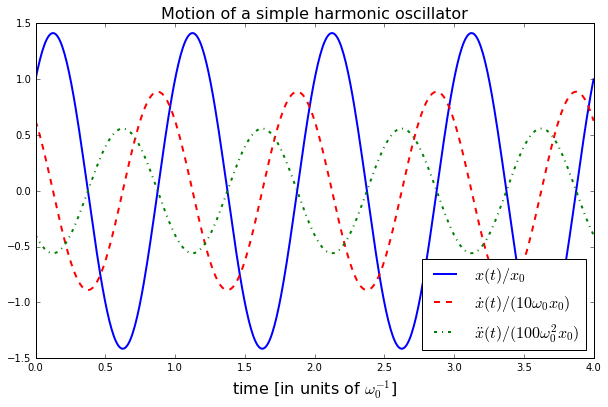

In [10]:
### plot motion vs time ###
# model parameters
mass = 1.0
omega0 = 2*np.pi

# initial conditions
x0 = 1.0
vx0 = omega0

# number of oscillations
n = 4

# create uniform time grid
tperiod = (2*np.pi)/omega0 
tmin = 0
tmax = n*tperiod
nsteps = 501
t = np.linspace(tmin, tmax, nsteps)

# plot
plt.figure(figsize=(10,6))
plt.plot(t, xva(t, omega0, x0, vx0)[0], 'b-', linewidth=2, label=r'$x(t)/x_{0}$')
plt.plot(t, xva(t, omega0, x0, vx0)[1]/10, 'r--', linewidth=2, label=r'$\dot{x}(t)/(10\omega_{0} x_{0})$')
plt.plot(t, xva(t, omega0, x0, vx0)[2]/100, 'g-.', linewidth=2, label=r'$\ddot{x}(t)/(100\omega_{0}^2 x_{0})$')
plt.xlim(tmin,tmax)
plt.title('Motion of a simple harmonic oscillator', fontsize=16)
plt.xlabel(r'time [in units of $\omega_{0}^{-1}$]', fontsize=16)
plt.legend(loc='lower right', fontsize=16)
plt.show()

## 2. Plot energy vs time

The kinetic energy of a simple harmonic oscillator is given by

$$
  K(t) = \frac{1}{2}m\dot{x}^2
  = \frac{1}{2}m\omega_{0}^2 A^2 \sin^2(\omega_{0}t - \delta).
$$

The potential energy is given by

$$
  U(t) = \frac{1}{2}m\omega_{0}^2 x^2
  = \frac{1}{2}m\omega_{0}^2 A^2 \cos^2(\omega_{0}t - \delta).
$$

The total energy is

$$
  E(t) = K(t) + U(t)
  = \frac{1}{2}m\omega_{0}^2 A^2.
$$

Notice that energy is conserved (does not depend on time).


**Exercise [matplotlib]:** For the same initial conditions as above, plot the kinetic energy, potential energy, and total energy on the same graph.

In [13]:
### energy functions ###
def energy(t, mass, omega0, x0, vx0):
    ke = 0.5*mass*velx(t, omega0, x0, vx0)*velx(t, omega0, x0, vx0)
    pe = 0.5*mass*omega0*omega0*posx(t, omega0, x0, vx0)*posx(t, omega0, x0, vx0)
    etot = ke + pe
    return ke, pe, etot

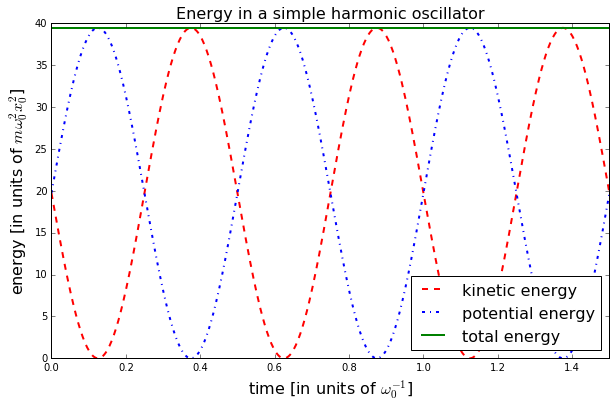

In [17]:
### plot energy vs time ###
# model parameters
mass = 1.0
omega0 = 2*np.pi

# initial conditions
x0 = 1.0
vx0 = omega0

# number of oscillations
n = 3/2

# create uniform time grid
tperiod = (2*np.pi)/omega0
tmin = 0
tmax = n*tperiod
nsteps = 501
t = np.linspace(tmin, tmax, nsteps)

# plot
plt.figure(figsize=(10,6))
plt.plot(t, energy(t, mass, omega0, x0, vx0)[0], 'r--', linewidth=2, label='kinetic energy')
plt.plot(t, energy(t, mass, omega0, x0, vx0)[1], 'b-.', linewidth=2, label='potential energy')
plt.plot(t, energy(t, mass, omega0, x0, vx0)[2], 'g-', linewidth=2, label='total energy')
plt.xlim(tmin,tmax)
plt.title('Energy in a simple harmonic oscillator', fontsize=16)
plt.xlabel(r'time [in units of $\omega_{0}^{-1}$]', fontsize=16)
plt.ylabel(r'energy [in units of $m\omega_{0}^2 x_{0}^2$]', fontsize=16)
plt.legend(loc='lower right', fontsize=16)
plt.show()